<a href="https://colab.research.google.com/github/stephenfrein/fultonlearning/blob/main/TreeModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Tree Models

## 1. The Business Problem



*   A bank wants to increase its term deposits (e.g., CDs) so that it has stable funding sources for making loans and other investments.

*   Leaders plan to use direct marketing calls to drive increases in term deposits.

*   Direct marketing is expensive – should we do it for everybody?

*   Need to find the customers most likely to make a term deposit after direct marketing and focus on those customers.




## 2. How to Find Likely Prospects?

*   We have current data about our customers.

*   We also have historical data about our customers and whether they’ve made term deposits previously after direct marketing efforts.

*   Can we find **patterns in the historical data** to **inform predictions** about **who is currently likely** to make a term deposit after direct marketing efforts?








## 3. Exploring the Historical Data

*   Historical data set: https://drive.google.com/uc?export=download&id=14rF76WupImV6e74vRc63UzAll4uhV1ia

*   The “customer_made_term_deposit” variable tells us if customer ultimately made a term deposit in response to marketing efforts.

*   Other variables about demographics, behavior, and previous marketing activities will be available to us for making predictions about the customers we have now.

*   Take some time to explore the historical data – what rule(s) would you use to identify customers likely to make a term deposit?

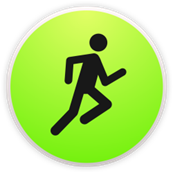

TAKE **5 MINUTES** TO EXPLORE the HISTORICAL DATA.

WHAT **RULE(S)** DO YOU SUGGEST FOR IDENTIFYING CUSTOMERS LIKELY TO MAKE A TERM DEPOSIT?



## 4. Check Your Suggested Rules

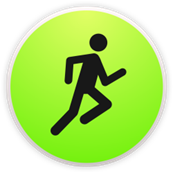

TAKE **3 MINUTES** TO CHECK YOUR SUGGESTED RULES.

Think about things like:

*   What % of outcomes do your rules predict correctly? (accuracy)
*   When your rule predicts that somebody will make a term deposit, how often is it correct? (precision)
*   Of all the people who ended up making term deposits, how many did your rule identify? (recall)



## 5. “Supervised” Machine Learning: Build Models from Labeled Examples

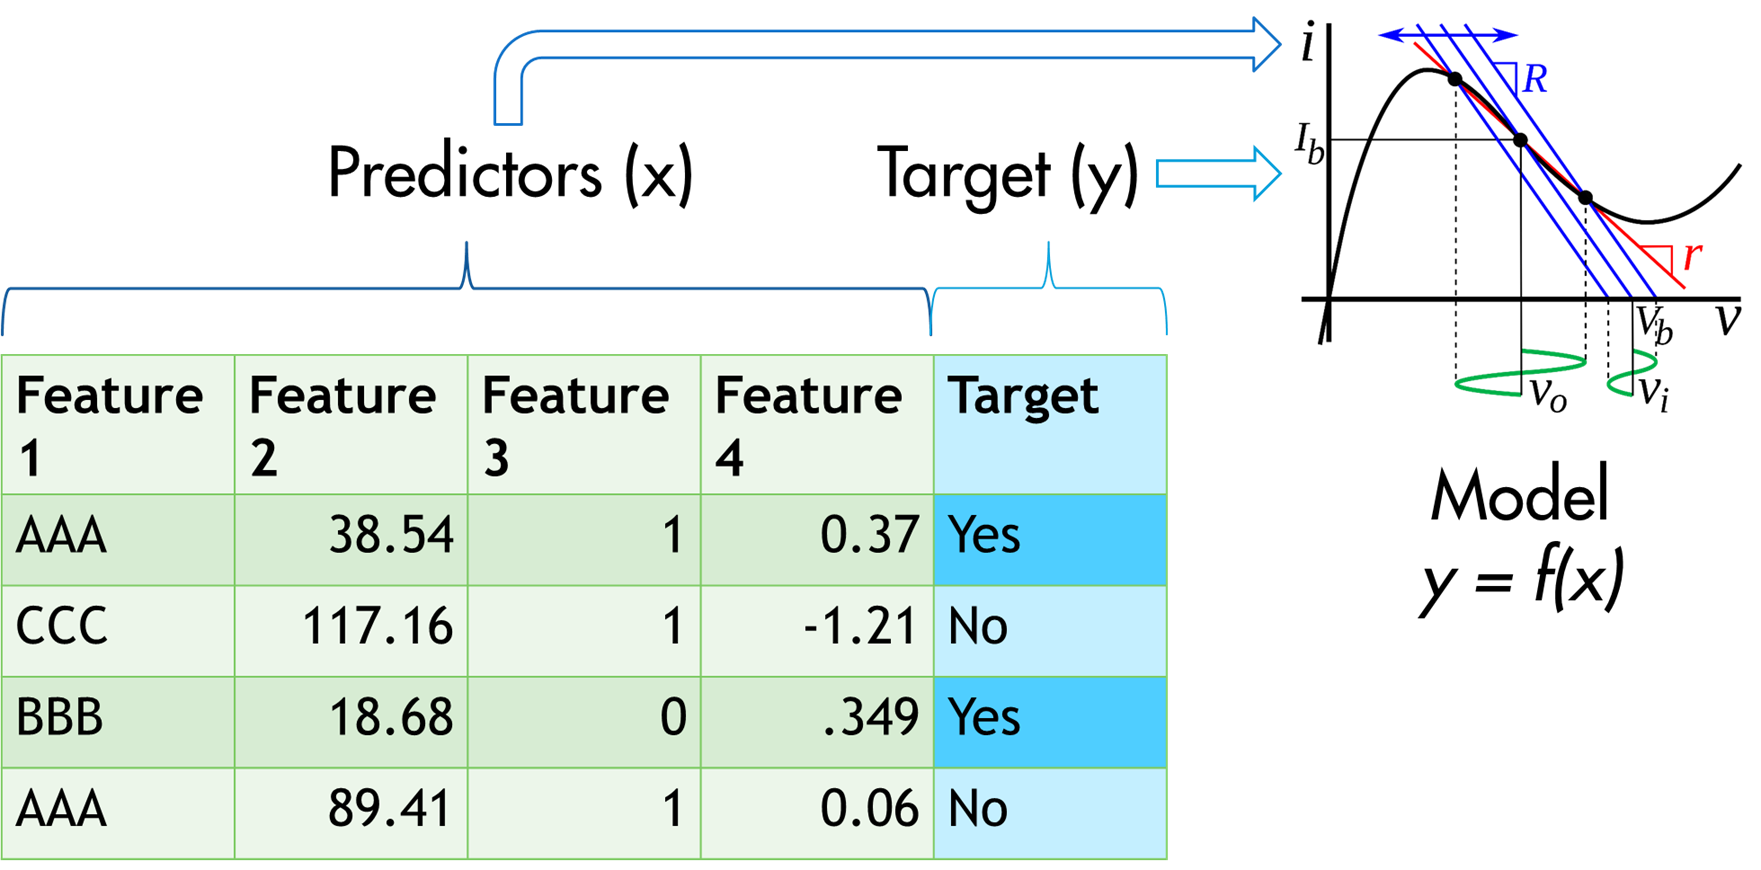

## 6. Then, Use Those Models for Prediction / Understanding
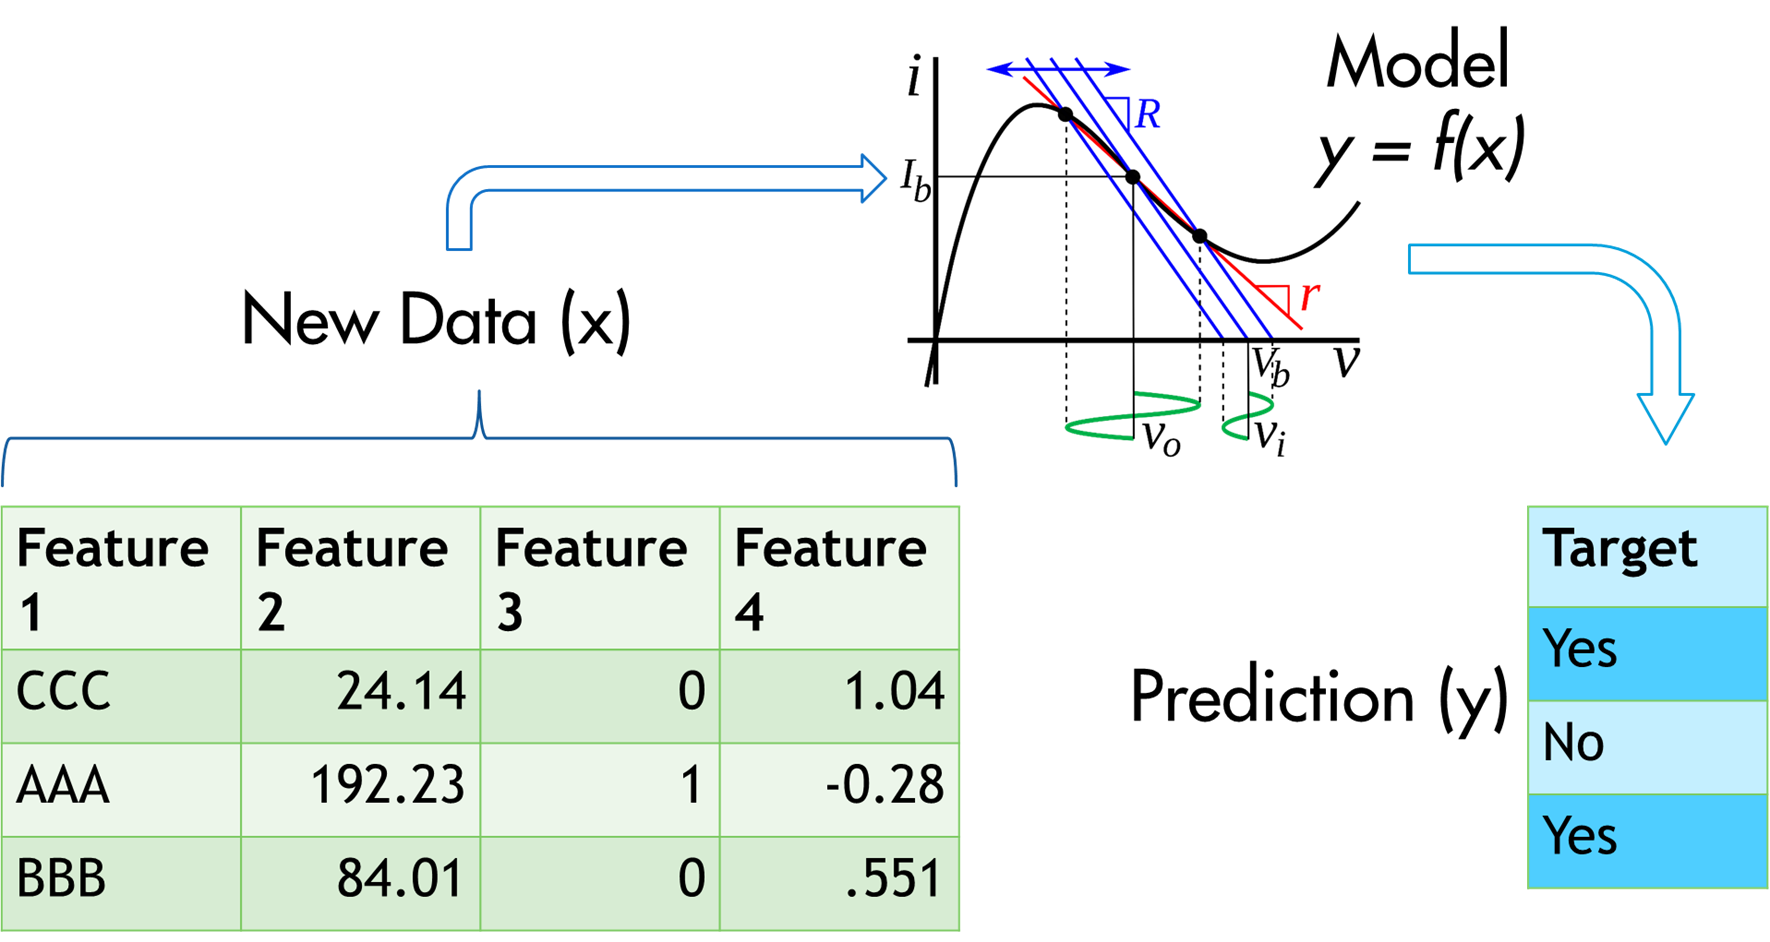

## 7. Python and scikit-learn

*   Commonly used machine learning platform
  *  Python is a general purpose software development language
  *  scikit-learn is a set of related libraries that are useful for machine learning
*   We’ll be using these in the Google Colab environment (this environment)
  *  Colab uses Jupyter notebooks – a common way to learn/execute ML code
  *  Similar to the Spark notebooks you'll use in Azure Synapse (Data Modernization)

  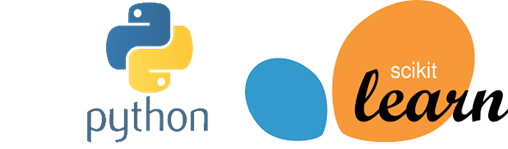



## 8. Decision Trees

*  Many different kinds of machine learning models
  *  logistic regression, decision trees, neural networks, etc.
*  Will focus on decision trees today
  *  Using these to predict categories (classification)
  *  Could also use them to predict numbers (regression)
*  Model rules as a series of if/then statements
*  Easy to understand/interpret
*  Require minimal data preparation
*  Built to maximize node purity (lower *gini impurity* - will explain calculation shortly)




## 9. Decision Tree Example - The Iris Dataset

This is a famous instructional data set in machine learning circles. It shows how we can predict the species of an iris (*setosa*, *versicolor*, or *virginica*) from measurements of its petals and sepals.

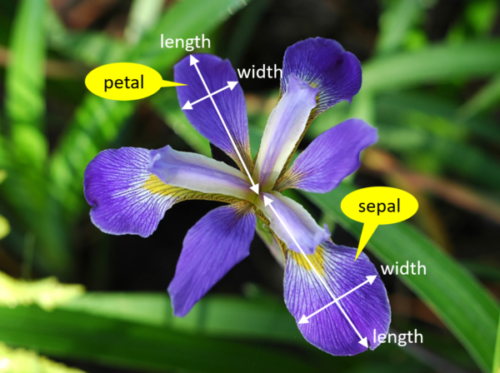

In [ ]:
# pandas is a Python library good for working with tabular data ("data frames")
import pandas as pd
# create a Pandas data frame using the Iris dataset - read in a CSV (comma-separated values) file from GitHub
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
# show the contents of the dataset
df

## 10. Iris Decision Tree Visualized

In the below:

*   *samples* tells you how many items you have in the node
*   *value* shows you the distribution of [setosa, veriscolor, virginica] in the node
*   *class* shows you the majority class in the node (first alphabetically if there's a tie)



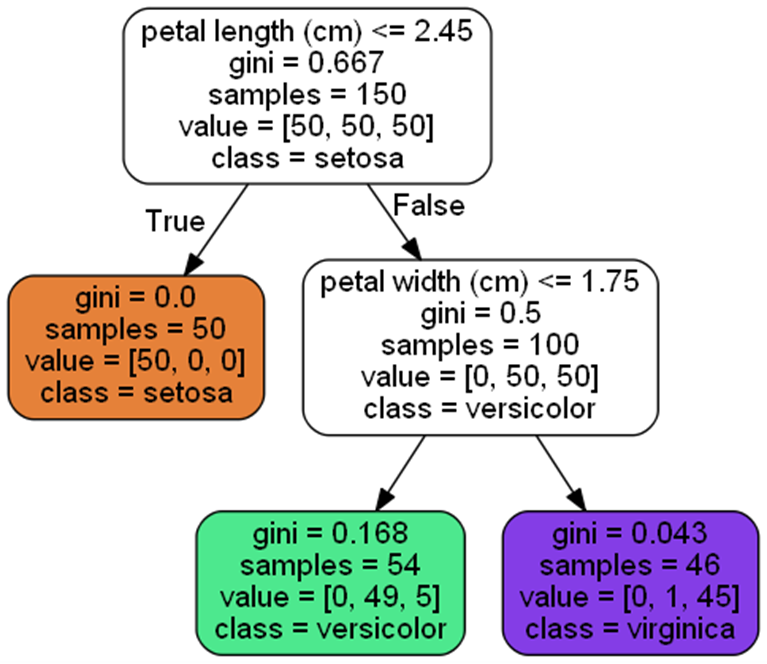


## 11. General Tree Building Algorithm (varies somewhat in different implementations)

* Start with the full data set
* Test **all values of all attributes** as ***split points*** to divide the data set into two separate nodes (above the value and below the value, equal/unequal to the value, in or out of a list of values)
* Select the combination of attribute and split point that makes the two resulting nodes most pure (lowest gini impurity or entropy) and use that as your next split in the tree
* Keep going until you reach some stopping criterion (e.g., all nodes homogenous, number of levels, etc.)




## 12. Calculating Gini Impurity

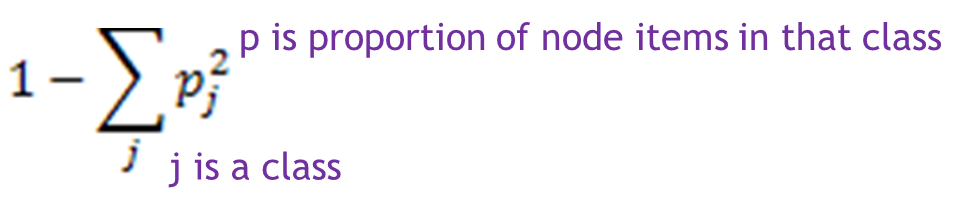

* Gini impurity is a measure of the homogeneity of a node in a decision tree
* Lower gini impurity = more “pure” node
* A 10-item node that is completely homogenous for a binary target:
  * $1 – (1^2 + 0^2) = 1 – (1 + 0) = 1 - 1 = .00$
* A 10-item node with an 8-2 split of a binary target:
  * $1 – (.8^2 + .2^2) = 1 – (.64 + .04) = 1 - .68 = .32$
* A 10-item node with a 5-5 split for a binary target:
  * $1 – (.5^2 + .5^2) = 1 – (.25 + .25) = 1 - .5 = .50$

  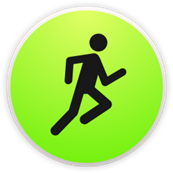

WHAT IS THE GINI IMPURITY OF A NODE THAT CONSISTS OF 5 "Yes" AND 2 "No" VALUES?

WHAT IS THE GINI IMPURITY OF A NODE THAT CONSISTS OF 5 "A" VALUES, 5 "B" VALUES, AND 5 "C" VALUES?




## 11. Build a Decision Tree by Hand

Download template file for exercise (MS Excel): https://drive.google.com/uc?export=download&id=19_j0OmMzwnT481fO6JtUDjAJ7c4GO5XF

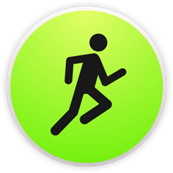

## 12. Preparing to Build a Decision Tree for Direct Marketing of Term Deposits

In [ ]:
# modules we will need
import pandas as pd # for working with data frames (tabular data)

# get raw data
url = "https://drive.google.com/uc?export=download&id=14rF76WupImV6e74vRc63UzAll4uhV1ia"
bank_customers_raw = pd.read_csv(url)

In [ ]:
# let's see what the data looks like
bank_customers_raw.head()

In [ ]:
# examine data statistically
# look for things like improbable high/low values
bank_customers_raw.describe(include='all')

In [ ]:
# this is our target variable - the outcome we want to predict / understand
target_var = 'customer_made_term_deposit'

In [ ]:
# base rates of success and failure - helps us to understand how our data is distributed and what valuable predictions would look like
print(bank_customers_raw[target_var].value_counts(normalize=True))
print(bank_customers_raw[target_var].value_counts())



In [ ]:
# create a separate copy - usually need to massage the data
bank_customers_clean = bank_customers_raw.copy()

# predictor variables - use all but our target variable
X = bank_customers_clean.drop(target_var,axis=1)
# target variable
y = bank_customers_clean[target_var]


## 13. Training/Test Split

* We will break our data into training and test sets
 * Training set is used to build model – what predictor values (X) explain our target variable (y)?
 * Test set allows us to check our model against data it has never “seen” and allows us to estimate its performance against future data

* There are more complex and effective ways to do similar things (e.g., cross-validation) but we'll stick with the training/test split for simplicity

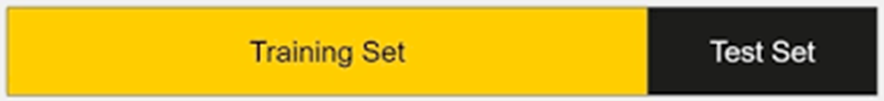


In [ ]:
# modules we will need
from sklearn.model_selection import train_test_split

# split into training (70%) and test (30%) sets - 70/30 and 80/20 splits are fairly common
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) # random_state sets a seed value for reproducibility

## 14. Time to Build that Tree!

In [ ]:
# modules we will need
from sklearn.tree import DecisionTreeClassifier
# decision tree classifier
simple_tree = DecisionTreeClassifier(max_depth=3, criterion='gini') # max_depth keeps us from "overfitting" and chasing noise in data set
# train decision tree classifer based on X and y values from training set
simple_tree = simple_tree.fit(X_train,y_train)

## 15. Ruh-roh! What Happened? (One-hot Encoding)

The implementation of decision trees in scikit-learn can’t handle character values – need to “one-hot” encode these to turn them into numbers.


In [ ]:
bank_customers_clean.info()
# any "object" column you see is a text string that needs to be numericized

In [ ]:
# get a list of object column names that we can use for one-hot encoding
object_columns = bank_customers_clean.select_dtypes(include=['object']).columns.tolist()
object_columns


In [ ]:
# START OVER AGAIN FROM THE RAW DATA AND ADD ONE-HOT ENCODING

# create a separate copy - usually need to massage the data
bank_customers_clean = bank_customers_raw.copy()

# get a list of object column names that we can use for one-hot encoding
object_columns = bank_customers_clean.select_dtypes(include=['object']).columns.tolist()
object_columns

# clean data
# one-hot encode character variables
bank_customers_clean = pd.get_dummies(bank_customers_clean,columns=object_columns)



In [ ]:
# now see what the one-hot encoded data set looks like
bank_customers_clean.info()

In [ ]:
# RECREATE TRAINING/TEST SPLIT AND TRY DECISION TREE AGAIN

# predictor variables - use all but our target variable
X = bank_customers_clean.drop(target_var,axis=1)
# target variable
y = bank_customers_clean[target_var]

# split into training (70%) and test (30%) sets - 70/30 and 80/20 splits are fairly common
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) # random_state sets a seed value for reproducibility

# decision tree classifier
simple_tree = DecisionTreeClassifier(max_depth=3, criterion='gini') # max_depth keeps us from "overfitting" and chasing noise in data set
# train decision tree classifer based on X and y values from training set
simple_tree = simple_tree.fit(X_train,y_train)

## 16. Good Grief - What Now? (Missing Values)

The implementation of decision trees in scikit-learn does not like null (NaN) values – get rid of ‘em!

In [ ]:
# since only one row has a null (see bank_customers_clean.info() above), just drop it
bank_customers_clean = bank_customers_clean.dropna()
bank_customers_clean.info()


In [ ]:
# RECREATE TRAINING/TEST SPLIT AND TRY DECISION TREE ONE LAST TIME

# predictor variables - use all but our target variable
X = bank_customers_clean.drop(target_var,axis=1)
# target variable
y = bank_customers_clean[target_var]

# split into training (70%) and test (30%) sets - 70/30 and 80/20 splits are fairly common
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) # random_state sets a seed value for reproducibility

# decision tree classifier
simple_tree = DecisionTreeClassifier(max_depth=3, criterion='gini') # max_depth keeps us from "overfitting" and chasing noise in data set
# train decision tree classifer based on X and y values from training set
simple_tree = simple_tree.fit(X_train,y_train)

In [ ]:
# modules we will need for plotting
from sklearn.tree import export_text
from sklearn import tree
import matplotlib.pyplot as plt

# plot it
plt.figure(figsize=(2,2), dpi=600)
tree.plot_tree(simple_tree.fit(X_train,y_train), feature_names = list(X.columns),
               class_names=['False','True'], filled=True)


In [ ]:
# see textual version
print(export_text(simple_tree, feature_names = list(X.columns)))

In [ ]:
from sklearn import metrics

# predict the response for test dataset
y_pred = simple_tree.predict(X_test)
# what % were classified correctly
print("Simple Tree Accuracy:", metrics.accuracy_score(y_test, y_pred))
# how does this compare to base rates of successful and unsuccessful attempts?

In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score
)

precision = precision_score(y_test, y_pred) # when we predict the person will make a term deposit, how often were we right?
recall = recall_score(y_test, y_pred) # how many of the actual term depositors did we correctly predict would make a term deposit?
f1score = f1_score(y_test, y_pred) # harmonic mean of the above (skews toward lower number)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

## 17. Drawbacks of Decision Trees

* Individual trees are easy to interpret, but highly dependent on sample
* Change your seed (random_state) value and see what happens

In [ ]:
# split into training (70%) and test (30%) sets - 70/30 and 80/20 splits are fairly common
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) # using new random state

# decision tree classifier
simple_tree = DecisionTreeClassifier(max_depth=3, criterion='gini') # max_depth keeps us from "overfitting" and chasing noise in data set
# train decision tree classifer based on X and y values from training set
simple_tree = simple_tree.fit(X_train,y_train)

# predict the response for test dataset
y_pred = simple_tree.predict(X_test)
# what % were classified correctly
print("Simple Tree New Accuracy:", metrics.accuracy_score(y_test, y_pred))
# how does this compare to your prior accuracy?

precision = precision_score(y_test, y_pred) # when we predict the person will make a term deposit, how often were we right?
recall = recall_score(y_test, y_pred) # how many of the actual term depositors did we correctly predict would make a term deposit?
f1score = f1_score(y_test, y_pred) # harmonic mean of the above (skews toward lower number)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

## 18. Random Forest

* Random forests create an ensemble of trees (e.g., hundreds)
  * Splits are randomly constrained in which variables they can look at
    * Often, number considered per split is ceiling of square root of number of variables
  * Each tree gets a different sample of training data
  * All the trees get to “vote” on a classification
* Usually outperforms individual decision trees – diversity of perspectives generalizes better to unseen data

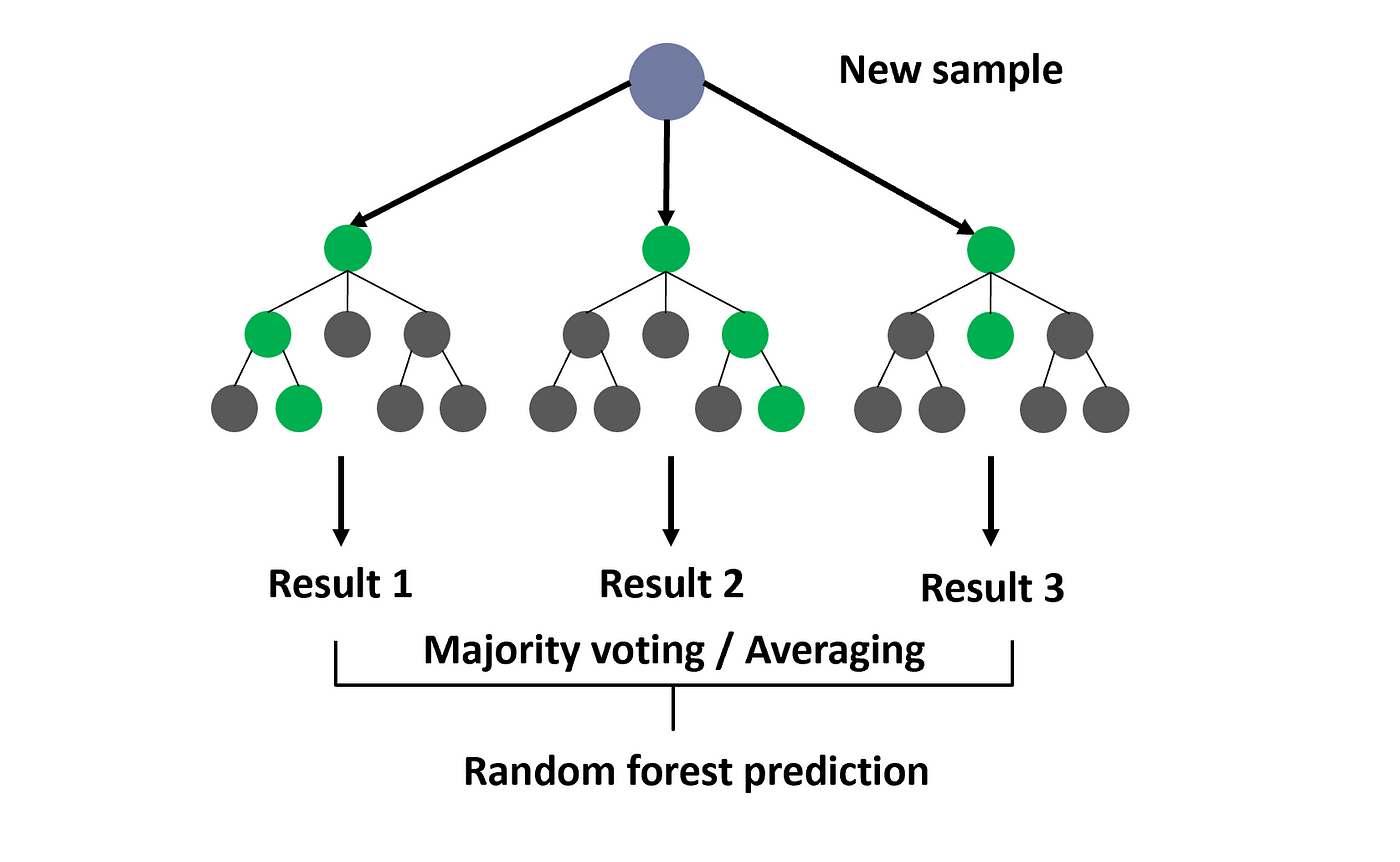

In [ ]:
## random forest approach
from sklearn.ensemble import RandomForestClassifier
# create new classifier - 500 trees
rf=RandomForestClassifier(n_estimators=500)
# train the model
rf.fit(X_train,y_train)
# predict the response for test dataset
y_pred=rf.predict(X_test)
# how many were classified correctly
print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred))


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

## 19. Feature Importance in Random Forest

* In decision tree, most important features are at the top of the tree
* How to see most important features when you have hundreds of separate trees?

In [ ]:
# which features are most important?
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

## 20. Feature Importance Calculation

* Each node in tree assigned an importance:

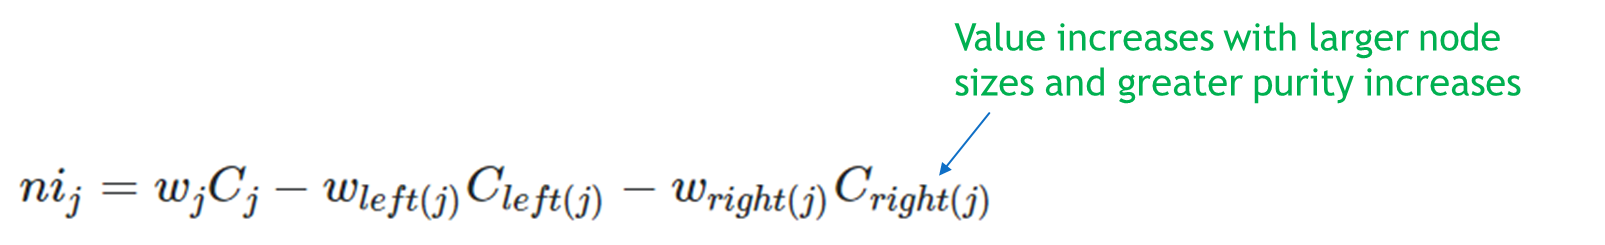


> (multiply weighted number of samples in node times its impurity, then do the same calculation for its child nodes and subtract those values from the parent node calculation)



* These values are used to determine the importance of features:

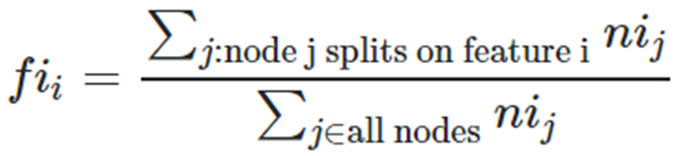

> (sum up the importance measures for all nodes split by that feature, and divide that by the sum of the importance of all nodes with splits)

Basically, importance tells us which features caused the most useful tree growth.



## 21. We're Done - Yay!

Questions?